This will be used to calculate return values using lasso regression. Below are 3 functions, which will predict 1 week, 1 month, and 1 year returns respectively. 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

(1915, 4)
(1915, 1)
(479, 4)
(479, 1)
(4, 4)
r value
0.6132476560266786
rmse value
7.228467008843027
(2597,)
(1915, 1)
(4,)
[113.20127525 103.90810581 101.90175079 113.03571098 113.8540836 ]
[109.57801817 111.13682003 114.71929766 111.76082464 109.96314321]


/Users/jimjr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.24974461464444, tolerance: 30.582224822033297
  model = cd_fast.enet_coordinate_descent(


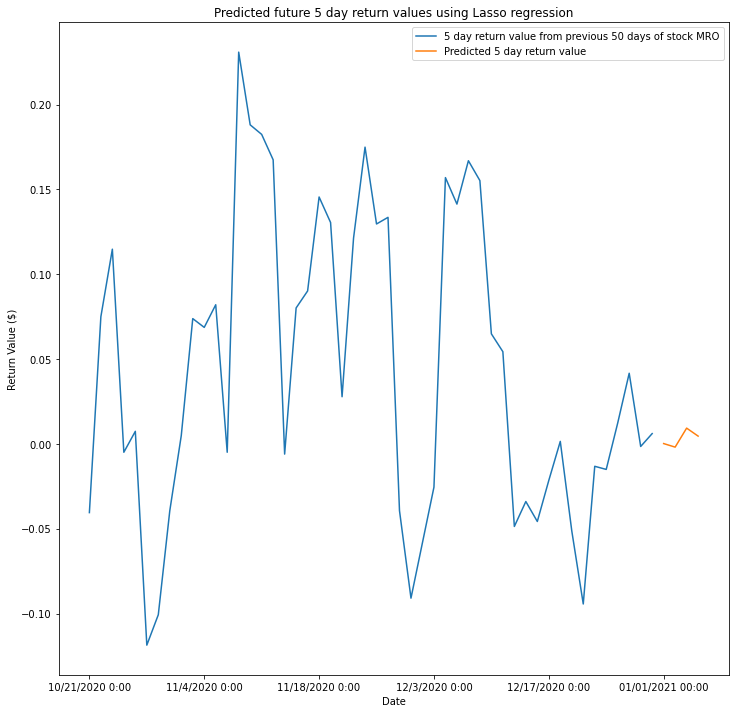

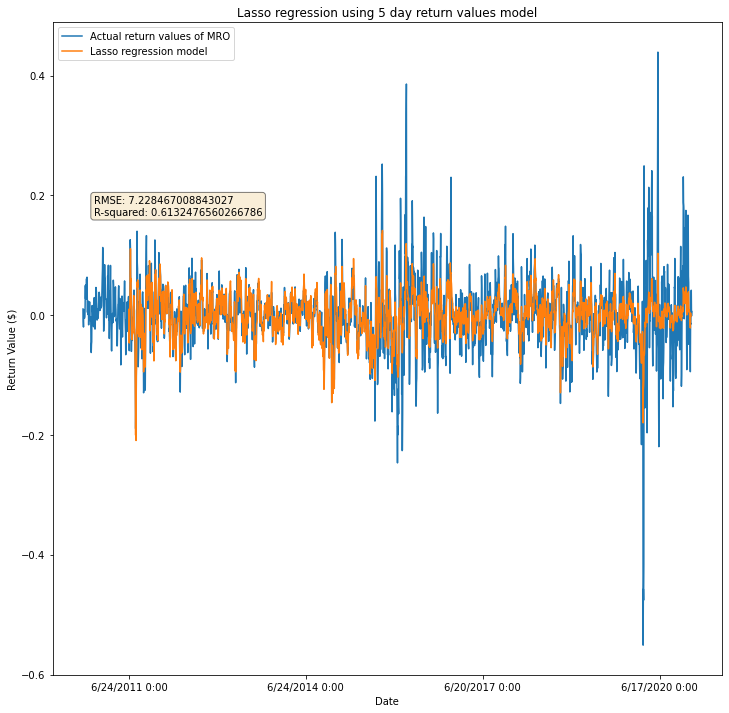

In [3]:
def lasso_regression_5day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _5day_ret = df[stock+ '_5day_mvg_return']
    X = np.stack((stock_prices[199:],_10day_ma[199:], _50day_ma[199:], _200day_ma[199:]), axis=1)
    y = np.array(_5day_ret[199:])
    y = np.reshape(y, (y.shape[0], 1))

    sc = MinMaxScaler(feature_range = (0,200)) #assigning values between 0 and 0.2 is not large enough. Scaling prevents underfitting.
    #try 0, some number if output is underfitted. Usually works best when 0,10
    y_scaled = sc.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-4], y_scaled[:y.shape[0] - 4], test_size=0.2)
    X_pred = X[X.shape[0] - 4:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    lasso_regression = Lasso()
    lasso_regression.fit(X_train, y_train)
    lasso_regression_score = lasso_regression.score(X_test, y_test)
    print("r value")
    print(lasso_regression_score)
    y_pred = lasso_regression.predict(X_pred)
    print("rmse value")
    y_hat = lasso_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(4):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    lasso_model = lasso_regression.predict(X[:X.shape[0] - 4])
    print(lasso_model[0:5])
    print(lasso_model[1500:1505])
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_pred = sc.inverse_transform(y_pred)
    lasso_model = np.reshape(lasso_model, (lasso_model.shape[0], 1))
    lasso_model = sc.inverse_transform(lasso_model)
    
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Predicted future 5 day return values using Lasso regression")
    axes.legend(["5 day return value from previous 50 days of stock " + stock, "Predicted 5 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 10, 20, 30, 40, 50]) #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates, _5day_ret)
    axes2.plot(dates[199:dates.shape[0] - 4] , lasso_model)
    
    axes2.legend(["Actual return values of " + stock, "Lasso regression model"])
    axes2.set_title("Lasso regression using 5 day return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1706, 2459])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(lasso_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(50, 0.2, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



lasso_regression_5day_ret('MRO')

(1915, 4)
(1915, 1)
(479, 4)
(479, 1)
(19, 4)
r value
0.5526843934841124
rmse value
14.672002416443767
(2597,)
(1915, 1)
(19,)


/Users/jimjr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2099.745285868121, tolerance: 90.36307642225093
  model = cd_fast.enet_coordinate_descent(


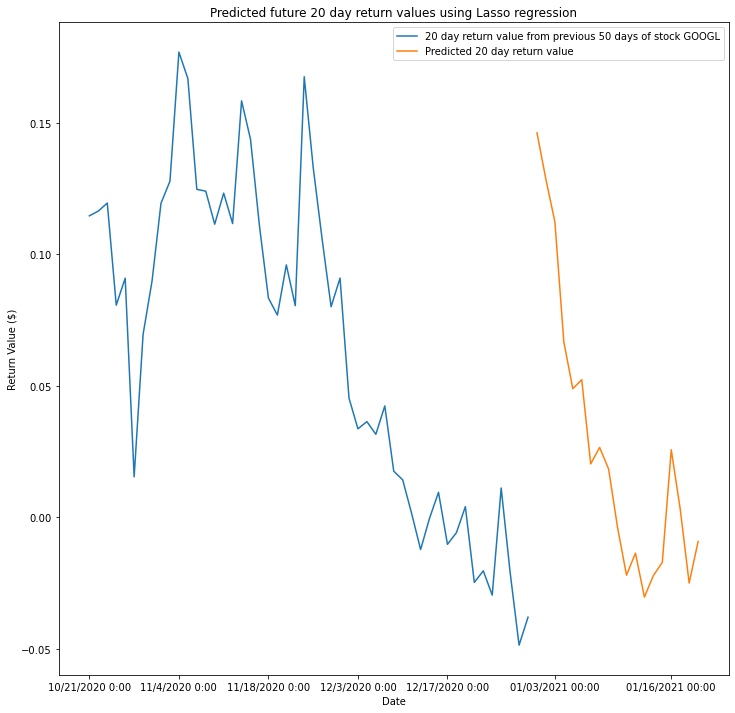

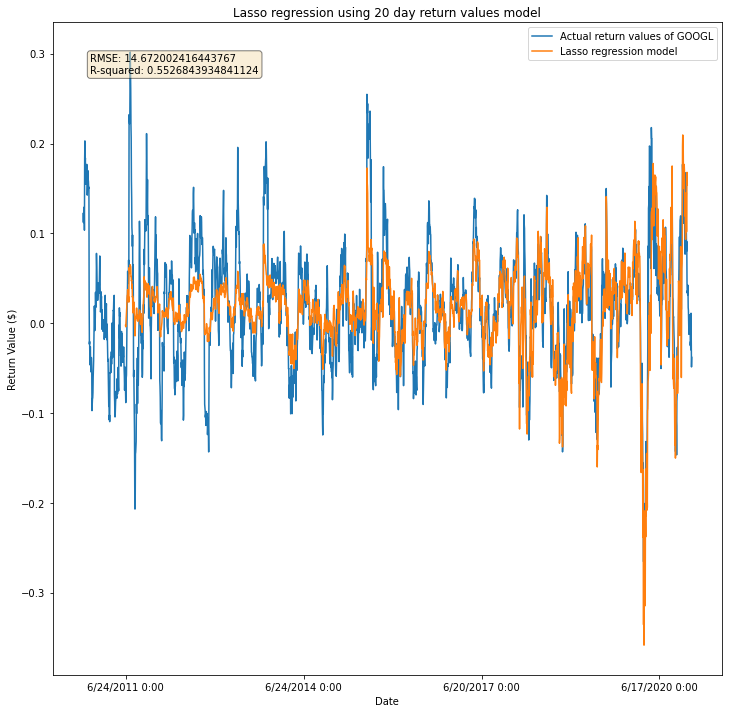

In [6]:
def lasso_regression_20day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _20day_ret = df[stock+ '_20day_mvg_return']
    X = np.stack((stock_prices[199:],_10day_ma[199:], _50day_ma[199:], _200day_ma[199:]), axis=1)
    y = np.array(_20day_ret[199:])
    y = np.reshape(y, (y.shape[0], 1))

    sc = MinMaxScaler(feature_range = (0,200)) #assigning values between 0 and 0.2 is not large enough. Scaling prevents underfitting.
    #try 0, some number if output is underfitted. Usually works best when 0,10
    y_scaled = sc.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-4], y_scaled[:y.shape[0] - 4], test_size=0.2)
    X_pred = X[X.shape[0] - 19:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    lasso_regression = Lasso()
    lasso_regression.fit(X_train, y_train)
    lasso_regression_score = lasso_regression.score(X_test, y_test)
    print("r value")
    print(lasso_regression_score)
    y_pred = lasso_regression.predict(X_pred)
    print("rmse value")
    y_hat = lasso_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(19):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    lasso_model = lasso_regression.predict(X[:X.shape[0] - 19])
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_pred = sc.inverse_transform(y_pred)
    lasso_model = np.reshape(lasso_model, (lasso_model.shape[0], 1))
    lasso_model = sc.inverse_transform(lasso_model)
    
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Predicted future 20 day return values using Lasso regression")
    axes.legend(["20 day return value from previous 50 days of stock " + stock, "Predicted 20 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 10, 20, 30, 40, 52, 65]) #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates, _20day_ret)
    axes2.plot(dates[199:dates.shape[0] - 19] , lasso_model)
    
    axes2.legend(["Actual return values of " + stock, "Lasso regression model"])
    axes2.set_title("Lasso regression using 20 day return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1706, 2459])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(lasso_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(50, 0.3, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



lasso_regression_20day_ret('GOOGL')

(1867, 4)
(1867, 1)
(467, 4)
(467, 1)
(259, 4)
r value
0.4531490091633229
rmse value
31.042528284592272
(2597,)
(1867, 1)
(259,)


/Users/jimjr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594990.8797401974, tolerance: 317.3235363992538
  model = cd_fast.enet_coordinate_descent(


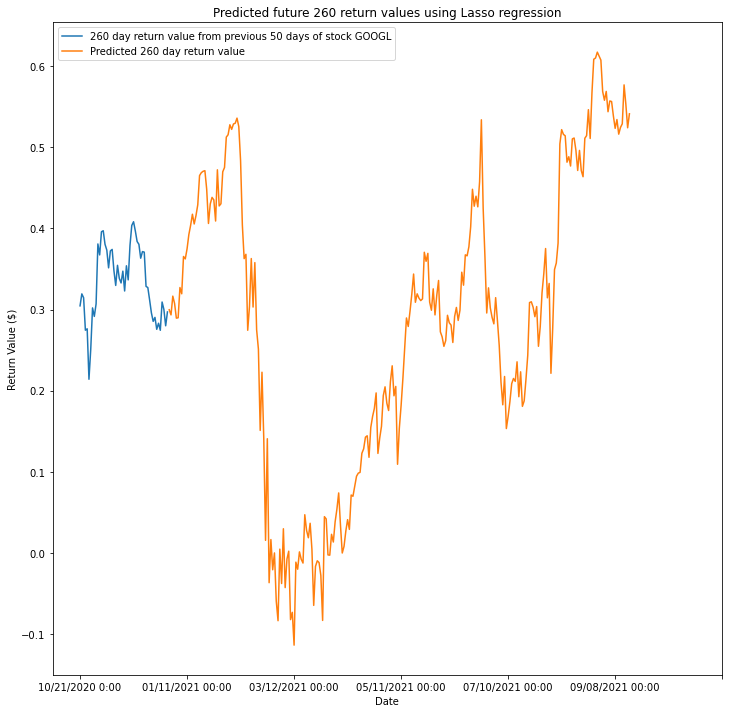

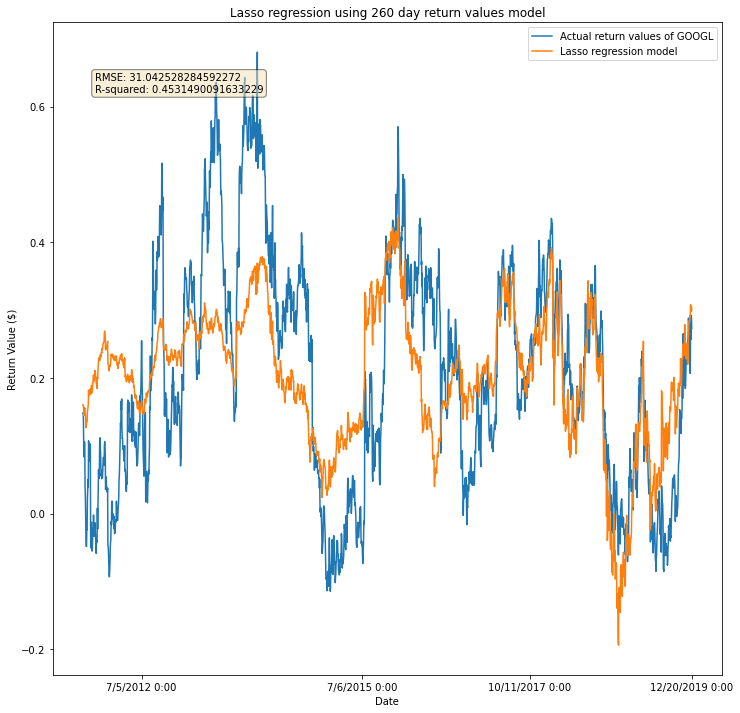

In [11]:
def lasso_regression_260day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _260day_ret = df[stock+ '_260day_mvg_return']
    X = np.stack((stock_prices[259:],_10day_ma[259:], _50day_ma[259:], _200day_ma[259:]), axis=1)
    y = np.array(_260day_ret[259:])
    y = np.reshape(y, (y.shape[0], 1))

    sc = MinMaxScaler(feature_range = (0,200)) #assigning values between 0 and 0.2 is not large enough. Scaling prevents underfitting.
    #try 0, some number if output is underfitted. Usually works best when 0,10
    y_scaled = sc.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-4], y_scaled[:y.shape[0] - 4], test_size=0.2)
    X_pred = X[X.shape[0] - 259:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    lasso_regression = Lasso()
    lasso_regression.fit(X_train, y_train)
    lasso_regression_score = lasso_regression.score(X_test, y_test)
    print("r value")
    print(lasso_regression_score)
    y_pred = lasso_regression.predict(X_pred)
    print("rmse value")
    y_hat = lasso_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(259):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    lasso_model = lasso_regression.predict(X[:X.shape[0] - 259])
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_pred = sc.inverse_transform(y_pred)
    lasso_model = np.reshape(lasso_model, (lasso_model.shape[0], 1))
    lasso_model = sc.inverse_transform(lasso_model)
    
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Predicted future 260 return values using Lasso regression")
    axes.legend(["260 day return value from previous 50 days of stock " + stock, "Predicted 260 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 60, 120, 180, 240, 300, 360])  #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates[259:-259], _260day_ret[259:-259])
    axes2.plot(dates[259:dates.shape[0] - 259] , lasso_model)
    
    axes2.legend(["Actual return values of " + stock, "Lasso regression model"])
    axes2.set_title("Lasso regression using 260 day return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1526, 2078])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(lasso_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(40, 0.65, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



lasso_regression_260day_ret('GOOGL')